In [1]:
import openslide
from openslide import open_slide
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
slide = open_slide("../Softsensor.ai/Assignment_dataset/whole_slide_images/Reactive hyperplasia.svs")

In [3]:
slide_pros = slide.properties
print(slide_pros)

<_PropertyMap {'aperio.AppMag': '40', 'aperio.MPP': '0.241158', 'openslide.comment': 'Aperio Image Library v10.2.24\r\r\n26187x27552 [0,0 26187x27552] [256x256] JPEG/YCbCr Q = 75|AppMag = 40|MPP = 0.241158', 'openslide.level-count': '3', 'openslide.level[0].downsample': '1', 'openslide.level[0].height': '27552', 'openslide.level[0].tile-height': '256', 'openslide.level[0].tile-width': '256', 'openslide.level[0].width': '26187', 'openslide.level[1].downsample': '4.0002291475710354', 'openslide.level[1].height': '6888', 'openslide.level[1].tile-height': '256', 'openslide.level[1].tile-width': '256', 'openslide.level[1].width': '6546', 'openslide.level[2].downsample': '16.003361858190708', 'openslide.level[2].height': '1722', 'openslide.level[2].tile-height': '256', 'openslide.level[2].tile-width': '256', 'openslide.level[2].width': '1636', 'openslide.mpp-x': '0.24115800000000001', 'openslide.mpp-y': '0.24115800000000001', 'openslide.objective-power': '40', 'openslide.quickhash-1': '0476f

In [4]:
print("vendor is : ", slide_pros['openslide.vendor'])

vendor is :  aperio


In [5]:
print("pixel size of x : ", slide_pros['openslide.mpp-x'])

pixel size of x :  0.24115800000000001


In [6]:
print("pixel size of y : ", slide_pros['openslide.mpp-y'])

pixel size of y :  0.24115800000000001


In [7]:
objective = float(slide.properties[openslide.PROPERTY_NAME_OBJECTIVE_POWER])

In [8]:
print("The objective power : ", objective)

The objective power :  40.0


In [9]:
slide_dimes = slide.dimensions
print(slide_dimes)

(26187, 27552)


In [10]:
slide_thumb_600 = slide.get_thumbnail(size = (600, 600))
slide_thumb_600.show()

In [11]:
slide_thumb_600_np = np.array(slide_thumb_600)

In [12]:
plt.figure(figsize=(8,8))

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

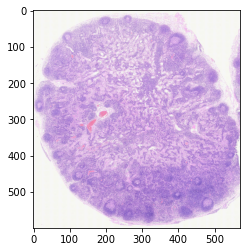

In [13]:
plt.imshow(slide_thumb_600_np)

In [14]:
# show dimesion
dims = slide.level_dimensions
num_level = len(dims)
print("the number of level in this image are : ", num_level)

the number of level in this image are :  3


In [15]:
print("Dimension of various level  of this image are : ", dims)

Dimension of various level  of this image are :  ((26187, 27552), (6546, 6888), (1636, 1722))


In [16]:
factors = slide.level_dimensions
print("Each level is downampled by amount : ", factors)

Each level is downampled by amount :  ((26187, 27552), (6546, 6888), (1636, 1722))


In [17]:
# level three dimension
level3_dim = dims[2]

In [18]:
level3_img = slide.read_region((0,0),2,level3_dim)
level3_img_rgb = level3_img.convert('RGB')
level3_img_rgb.show()

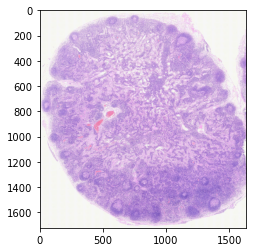

In [19]:
level3_img_np = np.array(level3_img_rgb)
plt.imshow(level3_img_np)

In [20]:
SCALE_FACTOR = 32
best_level = slide.get_best_level_for_downsample(SCALE_FACTOR)

In [21]:
from openslide.deepzoom import DeepZoomGenerator
tiles = DeepZoomGenerator(slide, tile_size=256, overlap=0, limit_bounds=False)
print("the number of level in the tile object's are : ", tiles.level_count)

the number of level in the tile object's are :  16


In [22]:
print("the number of dimension in the tile slides are : ", tiles.level_dimensions)

the number of dimension in the tile slides are :  ((1, 1), (2, 2), (4, 4), (7, 7), (13, 14), (26, 27), (52, 54), (103, 108), (205, 216), (410, 431), (819, 861), (1637, 1722), (3274, 3444), (6547, 6888), (13094, 13776), (26187, 27552))


In [23]:
# total no of tiles
print("Total No. of tiles : ", tiles.tile_count)

Total No. of tiles :  14894


In [24]:
# shape of tile at this level
level_num = 11
print("Tile shape at level : ", level_num," is ", tiles.level_tiles[level_num])

Tile shape at level :  11  is  (7, 7)


In [25]:
print("This mean there are : ", tiles.level_tiles[level_num][0]*tiles.level_tiles[level_num][0])

This mean there are :  49


In [26]:
tile_dims = tiles.get_tile_dimensions(11,(0,0))

In [28]:
tile_count_in_large_image = tiles.level_tiles[15]

In [34]:
tile_dims = tiles.get_tile_dimensions(15,(10,15))

In [45]:
single_tile = tiles.get_tile(15,(62,70))
single_tile_rgb = single_tile.convert('RGB')
single_tile_rgb.show()

In [46]:
cols, rows = tiles.level_tiles[15]

In [48]:
import os
tile_dir = "../Softsensor.ai/basedata/training/reactive_node/"
for row in range(rows):
    for col in range(cols):
        tile_name = os.path.join(tile_dir, '%d_%d' %(col, row))
        print("now saving tile with title : ", tile_name)
        temp_tile = tiles.get_tile(15,(col, row))
        temp_tile_rgb = temp_tile.convert('RGB')
        temp_tile_np = np.array(temp_tile_rgb)
        plt.imsave(tile_name+".png", temp_tile_np)

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/3_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/4_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/6_0
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/63_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/65_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_0
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_0
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_1
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/84_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_1
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_1
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_2
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_2
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/3_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/4_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/6_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/7_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_3
now saving tile with title :  C:/Users/mr

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/65_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_3
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_3
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_4
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_4
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_4
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_5
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_5
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/6_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/7_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_6
now saving tile with title :  C:/Users

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_6
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_6
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_7
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_7
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_7
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_8
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_8
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/6_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/7_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_9
now saving tile with title :  C:/Users/

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_9
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_9
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_10
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_10
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_10
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_11
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_11
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_12
now saving tile with title :

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_12
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_12
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_13
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_13
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_13
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_14
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_14
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_15
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_15
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_15
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_16
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_16
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_16
now saving tile with titl

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_17
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_17
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_18
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_18
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_18
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_19
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_19
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_19
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_20
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_20
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_21
now saving tile with title : 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_21
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_21
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_22
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/84_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_22
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_22
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_23
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_23
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_24
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/59_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_24
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_24
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/18_25
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_25
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/77_25
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_26
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_26
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_26
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_27
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_27
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/6_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/7_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_28
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/65_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_28
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_28
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_29
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/84_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_29
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_29
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_30
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_30
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_31
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/59_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_31
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_31
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/18_32
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_32
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/77_32
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_33
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_33
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_33
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_34
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_34
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/3_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/4_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_35
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/63_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/65_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_35
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_35
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/18_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/19_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/20_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_36
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/77_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/78_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/79_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/80_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_36
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_36
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_37
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_37
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_37
now saving tile with titl

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_38
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_38
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_39
now saving tile with title :

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_39
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_39
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_40
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/84_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_40
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_40
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_41
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_41
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/3_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/4_42
now saving tile with title :  

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/59_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/63_42
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_42
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/18_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/19_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/20_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_43
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/77_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/78_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/79_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/80_43
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_43
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_44
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_44
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_44
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_45
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_45
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/3_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/4_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/6_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/7_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_46
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/63_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/65_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_46
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_46
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/19_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/20_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_47
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/79_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/80_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/84_47
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_47
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_48
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_48
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_48
now saving tile with tit

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_49
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_49
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_50
now saving tile with title :

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_50
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_50
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_51
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_51
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_51
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_52
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_52
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/3_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/4_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_53
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/63_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/65_53
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_53
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/18_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/19_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/20_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_54
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/77_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/78_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/79_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/80_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_54
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_54
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_55
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_55
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_55
now saving tile with title

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_56
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_56
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/7_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_57
now saving tile with title :  

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_57
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_57
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_58
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/84_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_58
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_58
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_59
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_59
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_60
now saving tile with title

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/59_60
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_60
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_61
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_61
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_61
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_62
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_62
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_62
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_63
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_63
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/3_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/4_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/6_64
now saving tile with title :  C:/U

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/63_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/65_64
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_64
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/18_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/19_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/20_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_65
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/77_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/78_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/79_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/80_65
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_65
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_66
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_66
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_66
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_67
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_67
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/6_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/7_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_68
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/65_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_68
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_68
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_69
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/84_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_69
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_69
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_70
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_70
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_71
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/59_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_71
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_71
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_72
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_72
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_72
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_73
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_73
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_73
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_74
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_74
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/3_75
now saving tile with title :

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/59_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_75
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_75
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/18_76
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_76
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/77_76
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_77
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_77
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_77
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_78
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_78
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_79
now saving tile with title :

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_79
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_79
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_80
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_80
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_80
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_81
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_81
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/3_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/4_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/5_82
now saving tile with title :  C:

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/63_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/65_82
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/66_82
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/18_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/19_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/20_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_83
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/77_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/78_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/79_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/80_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_83
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_83
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_84
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_84
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_84
now saving tile with title

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_85
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_85
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_86
now saving tile with title : 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/67_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_86
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_86
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_87
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/84_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/85_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/86_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/87_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_87
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_87
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/43_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/44_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_88
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_88
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/2_89
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/59_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_89
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_89
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/19_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/20_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/24_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_90
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/78_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/79_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/80_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_90
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/84_90
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_91
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_91
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_91
now saving tile with title

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/55_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/56_92
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/57_92
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_93
now saving tile with title :

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_93
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_93
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/25_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/26_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/27_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/28_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/29_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/30_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_94
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/88_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/89_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_94
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_94
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/45_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/46_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_95
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_95
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_96
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_96
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_96
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_97
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_97
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_97
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/47_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_98
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_98
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/18_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/19_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/20_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/21_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/22_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/23_99
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/77_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/78_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/79_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/80_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/81_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/82_99
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/83_99
now saving tile with title 

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_100
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/42_100
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/14_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/15_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/16_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/17_101
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/75_101
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/76_101
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/31_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_102
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/90_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/91_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/92_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/93_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/94_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_102
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_102
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/48_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/49_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/50_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/51_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/52_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/53_103
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/54_103
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/7_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/8_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/9_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/10_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/11_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/12_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/13_104
now saving tile with ti

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/68_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/69_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/70_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/71_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/72_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/73_104
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/74_104
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/32_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/33_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/34_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_105
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/102_105
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/0_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/1_106
now saving tile wit

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/58_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/59_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/60_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/61_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/62_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/63_106
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/64_106
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/35_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/36_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/37_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/38_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/39_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/40_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/41_107
now saving tile with

now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/95_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/96_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/97_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/98_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/99_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/100_107
now saving tile with title :  C:/Users/mr/OneDrive/Desktop/tarang books/Data Science/Assignment_dataset/whole_slide_images/tile_dir2/101_107
now saving tile wi